<a href="https://colab.research.google.com/github/basketbob/ML/blob/main/netology_DS/dz2_stpy_32_kuzinvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('googleplaystore.csv')

In [ ]:
#чистим данные и назначаем формат некоторых столбцов
df['Price'].replace('Everyone', '0', inplace=True)
df['Price'] = df['Price'].str.replace('$', '')
df['Reviews'].replace('3.0M', '3000000', inplace=True)
df['Last Updated'].replace('1.0.19', 'January 1, 2019', inplace=True)

df['Price'] = df['Price'].astype('float64')
df['Reviews'] = df['Reviews'].astype('int64')
df['Last Updated'] = df['Last Updated'].astype('datetime64')

In [ ]:
df.info()

In [ ]:
group_by_content = df[['Rating', 'Content Rating']].groupby('Content Rating').sum()
group_by_content

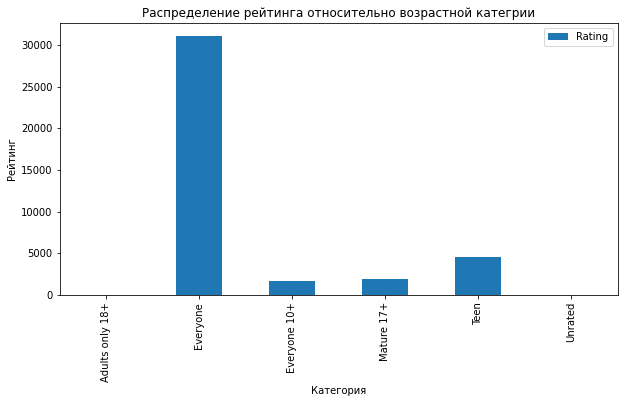

In [ ]:
'''
На данном графике фидно, что основной процент голосовавших приходится на людей не указавших категорию,
но если исключить даную категорию, то можно сделать вывод что подростки голосуют чаще всех.
'''
group_by_content.plot(title='Распределение рейтинга относительно возрастной категории',
                      xlabel='Категория',
                      ylabel='Рейтинг',
                      figsize=(10, 5),
                      kind='bar')

In [ ]:
reviews_by_years = df[['Reviews', 'Last Updated']].groupby(df['Last Updated'].dt.year).sum().sort_values('Last Updated')

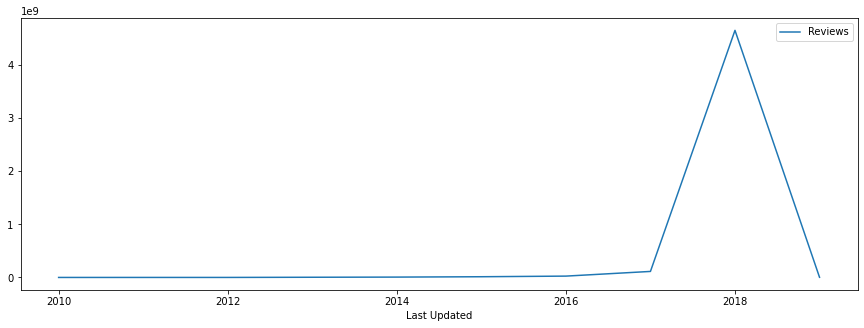

In [ ]:
# в 2017 году резкий экспоненциальный рост, в 2019 данные только за начало года, поэтому спад.
reviews_by_years.plot.line(figsize=(15, 5))


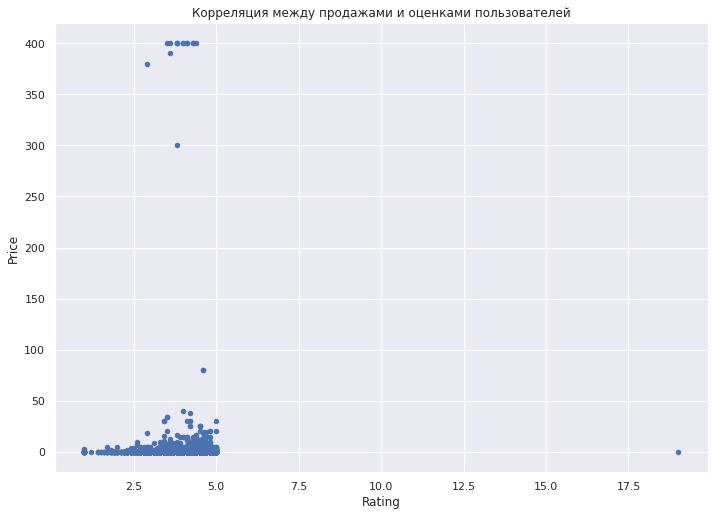

In [ ]:
'''
Имеются несколько выбросов, но видно, что основной процент голосует в пределах от 3 до 5,
при стоимости до $10, так же видно, что стоимость никак не влияет на рейтинг.
И видно один выброс с оценкой явно не в пределах нормы.
'''
df.plot(kind='scatter',
        x='Rating',
        y='Price',
        title='Корреляция между продажами и оценками пользователей')

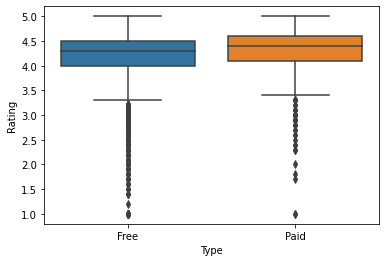

In [ ]:
'''
Тут видим, что бесплатные приложения оценивают равномерно по всем оценкам,
в платных есть резкий выброс на минимальную оценку
'''
sns.boxplot(x='Type', y='Rating', data=df[df['Rating'] < 10])